In [3]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import sys

from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import time


plt.rcParams["figure.figsize"] = (20, 16)
warnings.simplefilter("ignore")

sys.path.append("../1_Format_donnees/")
from aggregation import load_and_preprocess_agg_metrics, Scaler_Metrics
sys.path.append("../")

from evaluate import plot_confusion_matrix, get_scores

### <8 mbits en cumsum = bruit 

In [4]:
df_train = load_and_preprocess_agg_metrics("../Mesures/train")

Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 124.26it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 37.14it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 96.70it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 11.98it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.70it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.38it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.32it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|██████████████████████████████████████████████████████████████████████████████| 805/805 [00:00<00:00, 1177.50it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.44it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 34.78it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.69it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.65it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 46.32it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 26.42it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.08it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.40it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:01<00:00, 1160.89it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|██████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 1385.00it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|███████████████████████████████████████████████████████████████████████████████| 364/364 [00:02<00:00, 173.22it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 107.43it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 55.70it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 81.22it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 110.99it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 289.74it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|███████████████████████████████████████████████████████████████████████████████| 426/426 [00:00<00:00, 791.57it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 733.63it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 445.76it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|██████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 1240.03it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 1182.12it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


100%|████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 1081.50it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 1406.05it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 1168.11it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 569.88it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 726.90it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 583.16it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 892.36it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 316.80it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 271.99it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


100%|█████████████████████████████████████████████████████████████████████████████| 5593/5593 [00:55<00:00, 100.25it/s]


In [5]:
df_test = load_and_preprocess_agg_metrics("../Mesures/test")

Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 19.93it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  6.83it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  3.00it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1039.01it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 19.42it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|██████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 1096.72it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


100%|████████████████████████████████████████████████████████████████████████████████| 765/765 [00:12<00:00, 60.59it/s]


In [6]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

id
20221124_151137_4      messenger
20221124_151137_5      messenger
20221124_151137_6      messenger
20221124_151137_7      messenger
20221124_151137_8      messenger
                         ...    
20230117_121925_259      youtube
20230117_121925_260      youtube
20230117_121925_261      youtube
20230117_121925_262      youtube
20230117_121925_263      youtube
Name: label, Length: 765, dtype: object


,reg_lin_R2_TBS_1,reg_lin_coef_A_TBS_1,reg_lin_R2_TBS_2,reg_lin_coef_A_TBS_2,p0_TBS_1,p10_TBS_1,p25_TBS_1,p50_TBS_1,p75_TBS_1,p90_TBS_1,...,p0_TBS_2,p10_TBS_2,p25_TBS_2,p50_TBS_2,p75_TBS_2,p90_TBS_2,p100_TBS_2,mean_TBS_2,std_TBS_2,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4,1.409140,1.449940,0.402351,-0.101627,0.138751,0.217813,-0.124111,-0.073277,0.716816,0.662753,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,1.335680,-0.268988,-0.233816,messenger
20221117_125310_5,1.062412,-0.215354,0.440589,-0.107149,0.067866,-0.375499,-0.228940,-0.238736,-0.415108,-0.586022,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,messenger
20221117_125310_6,1.057756,-0.037047,0.440589,-0.107149,0.067866,-0.375499,-0.228940,-0.221619,-0.406310,-0.586022,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,messenger
20221117_125310_8,1.402432,1.438787,0.440589,-0.107149,-0.038462,0.217813,-0.054225,-0.004812,0.763735,0.610035,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,messenger
20221117_125310_7,1.403831,1.176822,-1.580600,-0.101637,0.067866,0.217813,-0.054225,0.006599,0.411842,0.482851,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.084867,-0.269149,-0.262006,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_162,-1.932830,0.718301,0.440589,-0.107149,-0.073905,1.150162,0.452448,0.679843,0.048219,-0.348787,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,youtube
20230124_124323_163,-1.544225,5.412745,0.440589,-0.107149,-0.073905,0.217813,-0.124111,4.730719,2.130255,0.820910,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,youtube
20230124_124323_164,-1.721674,1.152697,0.440589,-0.107149,-0.073905,1.150162,0.452448,0.679843,0.048219,0.610035,...,-0.018159,-0.032123,-0.03801,-0.069157,-0.135426,-0.191794,-0.341449,-0.272448,-0.305047,youtube


In [7]:
training_data = training_data[training_data .label!="noise"]
testing_data = testing_data[testing_data .label!="noise"]

In [16]:
time_counter = time.time_ns()

model = RandomForestClassifier()
model.fit(training_data[training_data.columns[:-1]], training_data.label)

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(training_data.label)}")

Training Duration : 0.7417292 s for a dataset length of 4114


In [17]:
# mesure efficiency
time_counter = time.time_ns()

preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(testing_data.label)}")
testing_duration_per_item = testing_duration*(10**3)/len(testing_data.label)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

Testing Duration : 0.3436205 s for a dataset length of 695
Testing Duration per data : 0.4944179856115108 ms


normalized confusion matrix


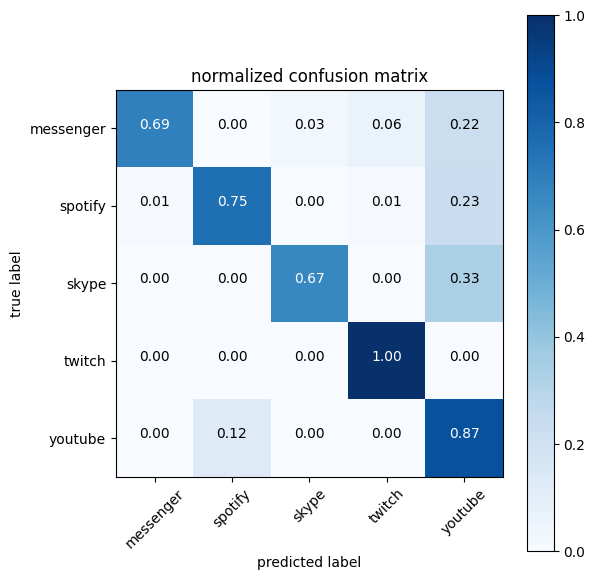

In [18]:
plot_confusion_matrix(true_labels,preds_labels)

In [19]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.7966064257028113,
 'Precision': 0.8269085945425302,
 'Recall': 0.8244604316546763,
 'F1_Score': 0.8241670042337894,
 'support': None}